(sec:titanic)=
# 판다스 실전: 타이타닉

**주요 내용**

타이타닉<font size='2'>Titanic</font> 데이터셋을 데이터프레임으로 불러와서 전처리 하는 과정을 살펴 본다.

**기본 설정**

`pandas` 라이브러리는 보통 `pd` 라는 별칭으로 사용된다.

In [1]:
import pandas as pd
import numpy as np

랜덤 시드, 어레이 내부에 사용되는 부동소수점 정확도, 도표 크기 지정 옵션 등은 이전과 동일하다.

In [2]:
np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))

사이킷런<font size='2'>scikit-learn</font> 라이브러리를 일부 이용한다.

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

**참고**: 

- https://jaketae.github.io/study/sklearn-pipeline/

In [4]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X.drop(['boat', 'body', 'home.dest'], axis=1, inplace=True)

In [5]:
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S


In [6]:
X.isnull().any()

pclass      False
name        False
sex         False
age          True
sibsp       False
parch       False
ticket      False
fare         True
cabin        True
embarked     True
dtype: bool

In [7]:
X.isnull().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [8]:
X.isnull().sum()/len(X) * 100

pclass       0.000000
name         0.000000
sex          0.000000
age         20.091673
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.076394
cabin       77.463713
embarked     0.152788
dtype: float64

In [9]:
X.drop(['cabin'], axis=1, inplace=True)

In [10]:
X.isnull().sum()

pclass        0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

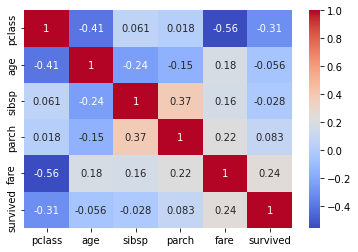

In [11]:
import pandas as pd
import seaborn as sns

X_comb = pd.concat([X, y.astype(float)], axis=1)
g = sns.heatmap(X_comb[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'survived']].corr(),
                annot=True, 
                cmap = "coolwarm")

In [12]:
X['family_size'] = X['parch'] + X['sibsp']
X.drop(['parch', 'sibsp'], axis=1, inplace=True)
X['is_alone'] = 1
X['is_alone'].loc[X['family_size'] > 1] = 0

X.head()

C:\Users\gslee\AppData\Local\Temp\ipykernel_16184\1881273339.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['is_alone'].loc[X['family_size'] > 1] = 0


,pclass,name,sex,age,ticket,fare,embarked,family_size,is_alone
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,S,0.0,1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,S,3.0,0
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,S,3.0,0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,S,3.0,0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,S,3.0,0


In [13]:
X['title'] =  X['name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
X.drop(["name"], axis=1, inplace=True)

X.head()

,pclass,sex,age,ticket,fare,embarked,family_size,is_alone,title
0,1.0,female,29.0000,24160,211.3375,S,0.0,1,Miss
1,1.0,male,0.9167,113781,151.5500,S,3.0,0,Master
2,1.0,female,2.0000,113781,151.5500,S,3.0,0,Miss
3,1.0,male,30.0000,113781,151.5500,S,3.0,0,Mr
4,1.0,female,25.0000,113781,151.5500,S,3.0,0,Mrs


In [14]:
pd.crosstab(X['title'], X['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [15]:
print(f"Miss: {np.sum(y.astype(int)[X.title == 'Miss']) / len(X.title == 'Miss')}")
print(f"Mrs: {np.sum(y.astype(int)[X.title == 'Mrs']) / len(X.title == 'Mrs')}")

Miss: 0.13445378151260504
Mrs: 0.11841100076394194


In [16]:
rare_titles = (X['title'].value_counts() < 10)
rare_titles

Mr              False
Miss            False
Mrs             False
Master          False
Rev              True
Dr               True
Col              True
Mlle             True
Ms               True
Major            True
Capt             True
Sir              True
Dona             True
Jonkheer         True
the Countess     True
Don              True
Mme              True
Lady             True
Name: title, dtype: bool

In [17]:
X.title.loc[X.title == 'Miss'] = 'Mrs'
X['title'] = X.title.apply(lambda x: 'rare' if rare_titles[x] else x)

C:\Users\gslee\AppData\Local\Temp\ipykernel_16184\434893034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.title.loc[X.title == 'Miss'] = 'Mrs'


In [18]:
X.drop('ticket', axis=1, inplace=True)

X.head()

,pclass,sex,age,fare,embarked,family_size,is_alone,title
0,1.0,female,29.0000,211.3375,S,0.0,1,Mrs
1,1.0,male,0.9167,151.5500,S,3.0,0,Master
2,1.0,female,2.0000,151.5500,S,3.0,0,Mrs
3,1.0,male,30.0000,151.5500,S,3.0,0,Mr
4,1.0,female,25.0000,151.5500,S,3.0,0,Mrs


In [19]:
X.dtypes

pclass          float64
sex            category
age             float64
fare            float64
embarked       category
family_size     float64
is_alone          int64
title            object
dtype: object

**참고**: 

- https://www.jcchouinard.com/classification-machine-learning-project-in-scikit-learn/

In [20]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X.drop(['boat', 'body', 'home.dest'], axis=1, inplace=True)

In [21]:
from sklearn.datasets import fetch_openml
 
titanic = fetch_openml('titanic', version=1, as_frame=True)

In [22]:
type(titanic)

sklearn.utils.Bunch

In [23]:
df = titanic['data']
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [24]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [25]:
df['survived'] = titanic['target']

In [26]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


In [27]:
df.describe()

,pclass,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000


**결측치 확인과 시각화**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(6), object(5)
memory usage: 116.8+ KB


In [29]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

In [30]:
miss_vals = pd.DataFrame(df.isnull().sum() / len(df) * 100)
miss_vals

,0
pclass,0.000000
name,0.000000
sex,0.000000
age,20.091673
sibsp,0.000000
parch,0.000000
ticket,0.000000
fare,0.076394
cabin,77.463713
embarked,0.152788


[`seaborn.set_theme()` 함수](https://seaborn.pydata.org/generated/seaborn.set_theme.html)를 이용하면 보다 세련된 그래프를 그린다.

In [31]:
sns.set_theme()

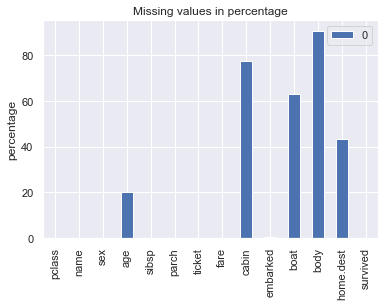

In [32]:
miss_vals.plot(kind='bar',
               title='Missing values in percentage',
               ylabel='percentage'
              )
 
plt.show()

**타깃 시각화**

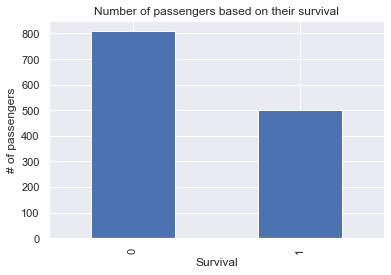

In [33]:
df.survived.value_counts().plot(kind='bar')
 
plt.xlabel('Survival')
plt.ylabel('# of passengers')
plt.title('Number of passengers based on their survival')
plt.show()

**연령별 생존자**

In [34]:
df.age.dropna()

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1301    45.5000
1304    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1046, dtype: float64

In [35]:
df['age'][df.survived == '1'].dropna()

0       29.0000
1        0.9167
5       48.0000
6       63.0000
8       53.0000
         ...   
1261    63.0000
1277    22.0000
1286    38.0000
1290    47.0000
1300    15.0000
Name: age, Length: 427, dtype: float64

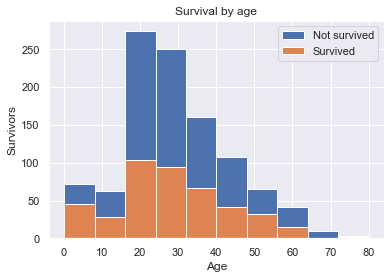

In [36]:
fig, ax = plt.subplots()
 
ax.hist(df.age.dropna(), label='Not survived')
ax.hist(df['age'][df.survived == '1'].dropna(), label='Survived')
 
plt.ylabel('Survivors')
plt.xlabel('Age')
plt.title('Survival by age')
plt.legend()
plt.show()

**성별 생존률**

In [37]:
((df['survived'][df.sex == 'male']) == 1).sum()

0

In [38]:
161/843

0.19098457888493475

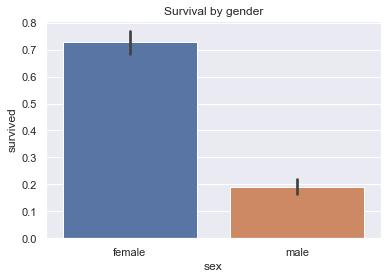

In [39]:
df['survived'] = df.survived.astype('int')
 
sns.barplot(data=df, 
            x='sex',
            y='survived'
           )
 
plt.title('Survival by gender')
plt.show()

**참고: `sns.barplot()` 함수**

<AxesSubplot:xlabel='island', ylabel='body_mass_g'>

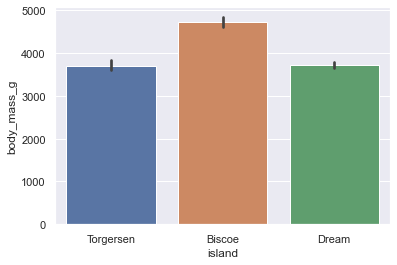

In [40]:
df_1 = sns.load_dataset("penguins")
sns.barplot(data=df_1, x="island", y="body_mass_g")

In [41]:
df_1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<AxesSubplot:xlabel='island', ylabel='body_mass_g'>

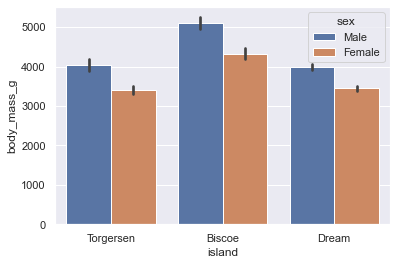

In [42]:
sns.barplot(data=df_1, x="island", y="body_mass_g", hue="sex")

- `errorbar` 옵션 인자
    - `ci`: confidence interval
    - `pi`: percentile interval
    - `se`: standard error
    - `sd`: standard deviation
    
- 참고: [Statistical estimation and error bars](https://seaborn.pydata.org/tutorial/error_bars.html)

<AxesSubplot:xlabel='island', ylabel='body_mass_g'>

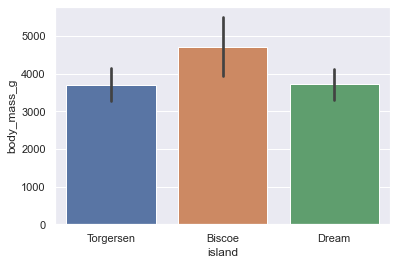

In [43]:
sns.barplot(data=df_1, x="island", y="body_mass_g", errorbar="sd") # 표준편차

**신분별 생존자**

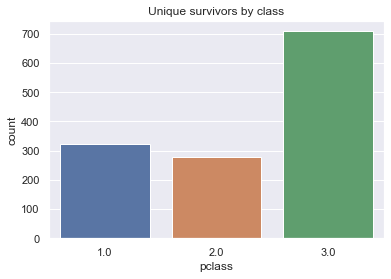

In [44]:
sns.countplot(x='pclass', data=df)
plt.title('Unique survivors by class')
plt.show()

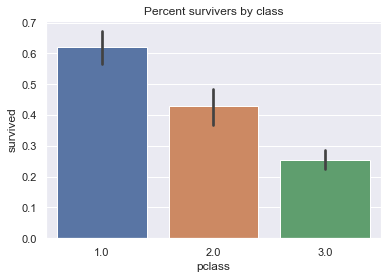

In [45]:
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Percent survivers by class')
plt.show()

**출발 항구별 생존률**

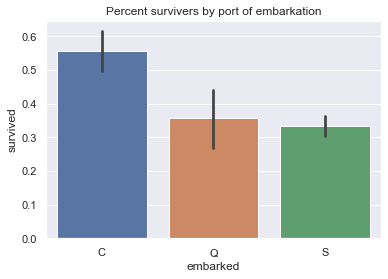

In [46]:
sns.barplot(x='embarked', y='survived', data=df)
plt.title('Percent survivers by port of embarkation')
plt.show()

**생존자 특성 분리**

In [47]:
X = df.drop('survived', axis=1)
y = df['survived']

**데이터 전처리**

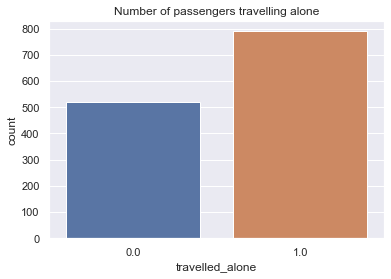

In [48]:
X['family'] = X['sibsp'] + X['parch']
X.loc[X['family'] > 0, 'travelled_alone'] = 0
X.loc[X['family'] == 0, 'travelled_alone'] = 1
X.drop(['family', 'sibsp', 'parch'], axis=1, inplace=True)
sns.countplot(x='travelled_alone', data=X)
plt.title('Number of passengers travelling alone')
plt.show()

### Preprocess Data with Scikit-learn

#### 결측치 처리

In [49]:
from sklearn.impute import SimpleImputer
 
def get_parameters(df):
    parameters = {}
    for col in df.columns[df.isnull().any()]:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64' or df[col].dtype =='int32':
            strategy = 'mean'
        else:
            strategy = 'most_frequent'
        missing_values = df[col][df[col].isnull()].values[0]
        parameters[col] = {'missing_values':missing_values, 'strategy':strategy}
    return parameters
 
parameters = get_parameters(X)
 
for col, param in parameters.items():
    missing_values = param['missing_values']
    strategy = param['strategy']
    imp = SimpleImputer(missing_values=missing_values, strategy=strategy)
    X[col] = imp.fit_transform(X[[col]])
 
X.isnull().sum()

pclass             0
name               0
sex                0
age                0
ticket             0
fare               0
cabin              0
embarked           0
boat               0
body               0
home.dest          0
travelled_alone    0
dtype: int64

**참고**: 

- https://medium.datadriveninvestor.com/implementation-of-data-preprocessing-on-titanic-dataset-6c553bef0bc6